---
---
# NON-LINEAR REGRESSON MODELS
---
---

* GEREKLİ KÜTÜPHANELER

In [271]:
import numpy as np
import pandas as pd
from sklearn.model_selection    import train_test_split, GridSearchCV
from sklearn.metrics            import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing      import scale
from sklearn.preprocessing      import StandardScaler
from sklearn                    import model_selection
from sklearn.linear_model       import LinearRegression
from sklearn.tree               import DecisionTreeRegressor
from sklearn.neighbors          import KNeighborsRegressor
from sklearn.neural_network     import MLPRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.ensemble           import GradientBoostingRegressor
from sklearn                    import neighbors
from sklearn.svm                import SVR
import xgboost
from xgboost                    import XGBRegressor
import lightgbm
from lightgbm                   import LGBMRegressor
import catboost
from catboost                   import CatBoostRegressor

In [6]:
from warnings import filterwarnings
filterwarnings("ignore")

---
# K EN YAKIN KOMŞU MODELİ
---

In [7]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

In [8]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,True,False,True
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,True,False,True
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,False,True,False
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,False,False,False
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,True,True,True


In [9]:
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,False,False,False
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,True,False,True
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,False,False,False
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,True,False,True
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,False,True,False


# MODEL KURMA

In [10]:
knn_model = KNeighborsRegressor().fit(X_train,Y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [11]:
dir(knn_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate

# MODEL TAHMİN

In [12]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
RMSE = np.sqrt(mean_squared_error(Y_test,y_pred))   #ilkel şekilde test hatası bulma
RMSE                                                #valide edilmemiş train hatası.

426.6570764525201

# MODEL TUNİNG

In [15]:
#knn'nin hiperparametresi n_neighbors = 5

In [16]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,Y_train)
    y_pred = knn_model.predict(X_test)
    rmse   = np.sqrt(mean_squared_error(Y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k," için RMSE değeri:", rmse)
#k için en uygun değer [1,10] için 8'miş. şimdi bunu otomatik şekilde bulalım.

k= 1  için RMSE değeri: 455.03925390751965
k= 2  için RMSE değeri: 415.99629571490965
k= 3  için RMSE değeri: 420.6765370082348
k= 4  için RMSE değeri: 428.8564674588792
k= 5  için RMSE değeri: 426.6570764525201
k= 6  için RMSE değeri: 423.5071669008732
k= 7  için RMSE değeri: 414.9361222421057
k= 8  için RMSE değeri: 413.7094731463598
k= 9  için RMSE değeri: 417.84419990871265
k= 10  için RMSE değeri: 421.6252180741266


In [17]:
#GridSearchCV
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,Y_train)
knn_cv_model.best_params_

{'n_neighbors': 8}

In [18]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,Y_train)

In [19]:
#tune edilmiş modelin test hatası
y_pred = knn_tuned.predict(X_test)
RMSE = np.sqrt(mean_squared_error(Y_test,y_pred))   #ilkel şekilde test hatası bulma
RMSE                                                #valide edilmemiş train hatası.

413.7094731463598

---
# DESTEK VEKTÖR REGRESYONU (SUPPORT VECTOR REGRESSİON) SVR MODELİ
---

In [20]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [21]:
svr_model = SVR(kernel="linear").fit(X_train,Y_train)
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# MODEL TAHMİN

In [22]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [23]:
svr_model.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [24]:
svr_model.intercept_

array([-80.15196063])

In [25]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [26]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred)) #linear için bu şekilde

370.0408415795005

In [27]:
#radial/linear olmayan için ise şu şekilde;
svr_model = SVR(kernel="rbf").fit(X_train,Y_train)
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

460.0032657244849

In [29]:
#eski hâline getirmek
svr_model = SVR(kernel="linear").fit(X_train,Y_train)
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

370.0408415795005

# MODEL TUNİNG

In [30]:
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
svr_params = {"C":[0.1,0.5,1,3]} #sayıları kafamızdan verdik.
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,Y_train)

In [32]:
svr_cv_model.best_params_

{'C': 0.5}

In [33]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5, verbose=2,n_jobs=-1).fit(X_train,Y_train) 
#verbose= 2 işlemleri yaparken zaman/süre gibi raporları verir.
#n_jobs  =-1 max işlemci gücünü kullanmanı sağlar.
svr_cv_model.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'C': 0.5}

In [34]:
#final model
svr_tuned = SVR(kernel="linear",C=0.5).fit(X_train,Y_train)
y_pred    = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

367.98747616655294

---
# YAPAY SİNİR AĞLARI
---

In [35]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [36]:
#standartlaştırma
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [37]:
mlp_model = MLPRegressor().fit(X_train_scaled,Y_train)
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# MODEL TAHMİN

In [38]:
mlp_model.predict(X_test_scaled)[0:5]

array([22.35615576, 35.07239673, 72.42736433,  9.43312655, 25.51106106])

In [39]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(Y_test,y_pred))

656.7237513817053

# MODEL TUNİNG

In [40]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.001,0.0001],
              "hidden_layer_sizes": [(10,20),(5,5),(100,100)]
              }

In [41]:
mpl_cv_model = GridSearchCV(mlp_model,mlp_params, cv=10,verbose=2,n_jobs=-1).fit(X_train_scaled,Y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [42]:
mpl_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [43]:
#final model
mlp_tuned = MLPRegressor(alpha=0.1,hidden_layer_sizes=(100,100)).fit(X_train_scaled,Y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(Y_test,y_pred))

354.7237729247065

---
# CART (CLASSIFICATION AND REGRESSION TREE)
---

In [44]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

In [45]:
X_train = pd.DataFrame(X_train["Hits"])
X_test  = pd.DataFrame(X_test["Hits"])

In [46]:
X_test.head()

,Hits
148,136.0
154,147.0
318,136.0
279,96.0
88,41.0


# MODEL KURMA

In [47]:
cart_model = DecisionTreeRegressor().fit(X_train,Y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

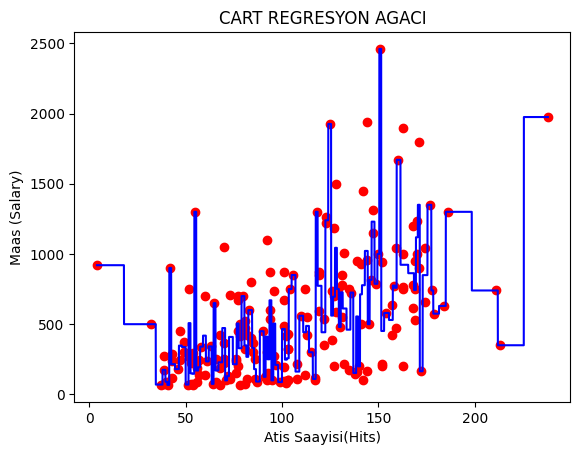

In [48]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X_train,Y_train,color ="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")

plt.title("CART REGRESYON AGACI")
plt.xlabel("Atis Saayisi(Hits)")
plt.ylabel("Maas (Salary)");

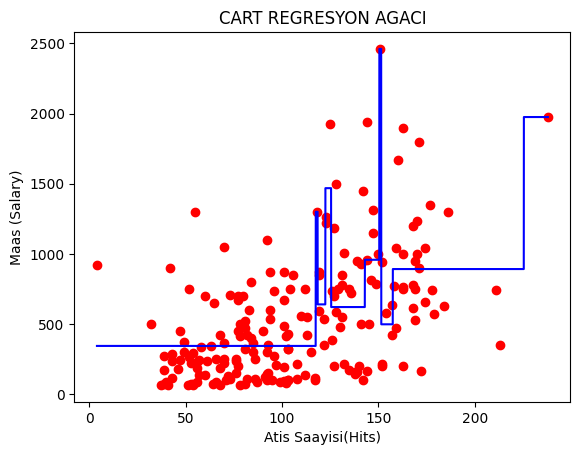

In [49]:
#maks dallanma sayısını kontrol edersek;
cart_model = DecisionTreeRegressor(max_leaf_nodes =10).fit(X_train,Y_train)

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X_train,Y_train,color ="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")

plt.title("CART REGRESYON AGACI")
plt.xlabel("Atis Saayisi(Hits)")
plt.ylabel("Maas (Salary)");

# MODEL TAHMİN

In [50]:
# Tek degiskenli Tahmin
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

486.34593105235456

In [51]:
# Tum degiskenlerle Tahmin
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.




cart_model = DecisionTreeRegressor().fit(X_train,Y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [52]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

430.51043300999635

# MODEL TUNİNG

En önemli parametreler
* min_sample_split ve max_depth

In [53]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [54]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(X_train,Y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

391.5530522634767

In [55]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=3)
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in the half mean Poisson deviance to find splits.

    ..

In [56]:
cart_params = {"max_depth"        : [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10]
}

In [57]:
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train,Y_train)

In [58]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [59]:
#final model
cart_model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_split=50).fit(X_train,Y_train)

y_pred = cart_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

411.9886403043614

---
# RANDOM FORESTS
---

In [60]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [61]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,Y_train)
rf_model.get_params()
# random_state = seed

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# MODEL TAHMİN


In [62]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

344.8191624908484

# MODEL TUNİNG

En önemli parametreler
* n_estimators : fit edilecek ağaç sayısı
* bölünme işlemlerinde göz önünde bulunduralacak olan değişken sayısı
* min_sample_split ve max_depth

In [63]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [64]:
rf_params = {"max_depth"        : [5,8,10],
             "max_features"     : [2,5,10],
             "n_estimators"     : [200,500,1000,2000],
             "min_samples_split": [2,10,80,100]}

In [65]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=3).fit(X_train,Y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [66]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [67]:
rf_tuned_model = RandomForestRegressor( random_state       =42,
                                        max_depth          =8,
                                        max_features       =2,
                                        min_samples_split  =2,
                                        n_estimators       =200)
rf_tuned_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [68]:
y_pred = rf_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

349.1649379391149

### DEĞİŞKEN ÖNEM DÜZEYİ

In [69]:
rf_tuned_model.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

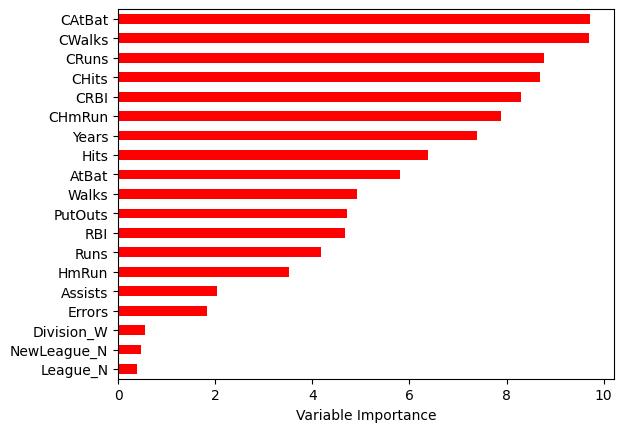

In [70]:
Importance = pd.DataFrame({"Importance":rf_tuned_model.feature_importances_*100},
                          index=X_train.columns)

Importance.sort_values(by ="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color ="r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None

---
# Gradient Boosting Machines (GBM)
---

In [71]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [72]:
gbm_model = GradientBoostingRegressor().fit(X_train,Y_train)
gbm_model.get_params()
# random_state = seed

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# MODEL TAHMİN


In [73]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

346.2450262849484

# MODEL TUNİNG

En önemli parametreler
* criterion : Bölünmeler ile ilgili saflık ölçüsü
* learning_rate: Ağaçların katkılarıyla ilgili bir değer
* loss(cost) : kayıp fonksiyonu ; "ls" en küçük kareler. 
* n_estimators : fit edilecek ağaç sayısı
* bölünme işlemlerinde göz önünde bulunduralacak olan değişken sayısı
* min_sample_split ve max_depth

In [74]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [75]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`~sklearn.ensemble.HistGradientBoostingRegressor` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports monotonic constraints.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to t

In [76]:
gbm_params = {"learning_rate"   : [0.001,0.1,0.01],
              "max_depth"       : [3,5,8],
              "n_estimators"    : [100,200,500],
              "subsample"       : [1,0.5,0.8],
              "loss"            : ["ls","lad","quantile"]}

In [77]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=1).fit(X_train,Y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [78]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 0.5}

In [79]:
gbm_tuned_model = GradientBoostingRegressor(learning_rate = 0.1,
                                            loss          = 'quantile',
                                            max_depth     = 8,
                                            n_estimators  = 500,
                                            subsample     = 0.5
                                            ).fit(X_train,Y_train)

In [80]:
y_pred = gbm_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

382.04427408888733

### DEĞİŞKEN ÖNEM DÜZEYİ

In [81]:
gbm_tuned_model.feature_importances_*100

array([ 5.39370302,  6.44638054,  5.69699449,  5.11961173,  7.27165153,
        7.96835372,  3.47163219,  4.24879917,  3.85729613,  5.99613387,
        4.82100051,  5.33871641,  6.03360972, 10.43563741,  7.48673051,
        6.85977747,  1.06315134,  1.40277003,  1.08805021])

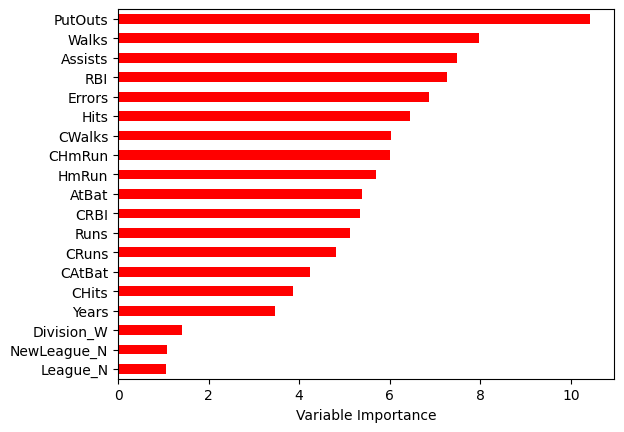

In [82]:
Importance = pd.DataFrame({"Importance":gbm_tuned_model.feature_importances_*100},
                          index=X_train.columns)

Importance.sort_values(by ="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color ="r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None

---
# eXTREME GRADIENT BOOSTING (XGBOOST)
---

In [83]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [84]:
xgb_model = XGBRegressor().fit(X_train,Y_train)
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# MODEL TAHMİN


In [85]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

366.3863437634965

# MODEL TUNİNG

En önemli parametreler
* learning_rate: Ağaçların katkılarıyla ilgili bir değer. Daraltma adım boyunu ifade eder. 
* n_estimators : fit edilecek ağaç sayısı
* bölünme işlemlerinde göz önünde bulunduralacak olan değişken sayısı
* min_sample_split ve max_depth
* colsample_bytree : Oluşturulacak olan ağaçlarda değişkenlerden alınacak olan alt küme oranını ifade eder.

In [86]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
xgb_params = {"learning_rate"   : [0.1,0.01,0.5],
              "max_depth"       : [2,3,4,5,8],
              "n_estimators"    : [100,200,500,1000],
              "colsample_bytree": [0.4,0.7,1]}

In [88]:
xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,Y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [89]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 100}

In [90]:
xgb_tuned_model = XGBRegressor(learning_rate       = 0.5,
                               max_depth           = 3,
                               n_estimators        = 100,
                               colsample_bytree    = 0.4).fit(X_train,Y_train)

In [91]:
y_pred = xgb_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

374.29091564195204

### DEĞİŞKEN ÖNEM DÜZEYİ

In [92]:
xgb_tuned_model.feature_importances_*100

array([ 0.6365863 ,  9.454955  ,  0.37053883,  0.453004  ,  1.755182  ,
        4.4546423 ,  4.5688686 , 13.744291  , 35.983303  ,  2.081322  ,
        4.07192   ,  9.860358  ,  2.1229773 ,  5.8136916 ,  0.8898804 ,
        0.7870701 ,  0.26322988,  0.85170746,  1.836467  ], dtype=float32)

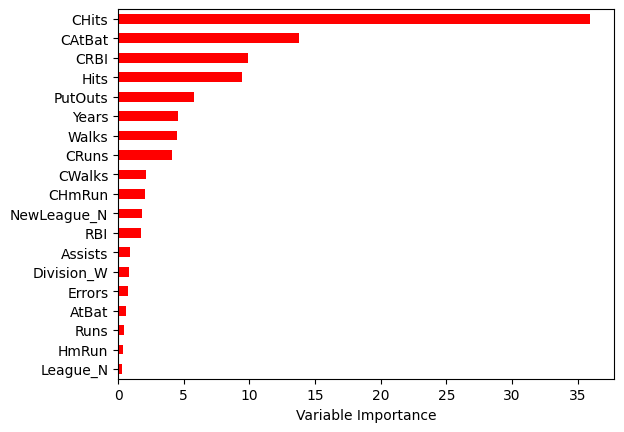

In [93]:
Importance = pd.DataFrame({"Importance":xgb_tuned_model.feature_importances_*100},
                          index=X_train.columns)

Importance.sort_values(by ="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color ="r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None

---
# LIGHTGBM
---

In [94]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [95]:
lgbm_model = LGBMRegressor().fit(X_train,Y_train)
lgbm_model.get_params()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

# MODEL TAHMİN


In [96]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

363.8712087611089

# MODEL TUNİNG

En önemli parametreler
* learning_rate: Ağaçların katkılarıyla ilgili bir değer. Daraltma adım boyunu ifade eder. 
* n_estimators : fit edilecek ağaç sayısı
* bölünme işlemlerinde göz önünde bulunduralacak olan değişken sayısı
* min_sample_split ve max_depth
* colsample_bytree : Oluşturulacak olan ağaçlarda değişkenlerden alınacak olan alt küme oranını ifade eder.

In [97]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [98]:
lgbm_params = {"learning_rate"   : [0.01,0.1,0.5,1],
              "max_depth"       : [1,2,3,4,5,6,7,8,9,10],
              "n_estimators"    : [20,40,100,200,500,1000]}

In [99]:
lgbm_cv_model = GridSearchCV(lgbm_model,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,Y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [100]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [101]:
lgbm_tuned_model = XGBRegressor(learning_rate      = 0.1,
                               max_depth           = 6,
                               n_estimators        = 20).fit(X_train,Y_train)

In [102]:
y_pred = lgbm_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

363.769657767386

### DEĞİŞKEN ÖNEM DÜZEYİ

In [103]:
lgbm_tuned_model.feature_importances_*100

array([ 2.5473557,  3.1044617,  0.5653238,  3.6478639,  3.9217327,
        2.5707123,  2.4838166,  1.8366364, 55.182808 ,  2.7334545,
        0.9102957,  7.7248325,  2.5086975,  4.3140335,  2.258346 ,
        0.5455021,  0.9208686,  1.4082441,  0.8150127], dtype=float32)

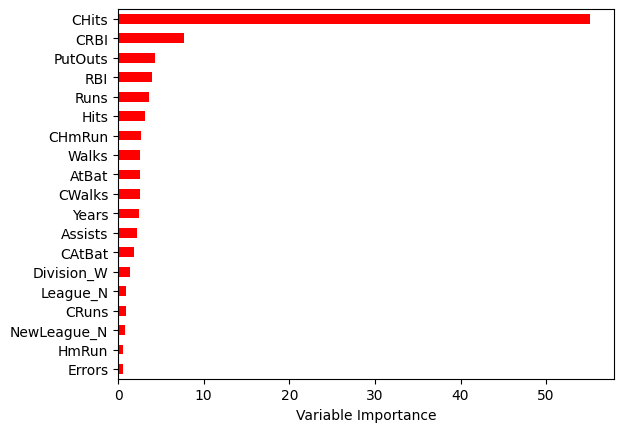

In [104]:
Importance = pd.DataFrame({"Importance":lgbm_tuned_model.feature_importances_*100},
                          index=X_train.columns)

Importance.sort_values(by ="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color ="r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None

---
#   CATEGORY BOOSTING (CATBOOST)
---

In [105]:
df  = pd.read_csv("../linear_regression/Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

# MODEL KURMA

In [106]:
catb_model = CatBoostRegressor().fit(X_train,Y_train)
catb_model.get_params()

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 158ms	remaining: 2m 37s
1:	learn: 431.3923642	total: 158ms	remaining: 1m 19s
2:	learn: 424.8820360	total: 159ms	remaining: 53s
3:	learn: 418.2514904	total: 160ms	remaining: 39.9s
4:	learn: 412.6394021	total: 161ms	remaining: 32.1s
5:	learn: 406.6247020	total: 162ms	remaining: 26.8s
6:	learn: 400.5321206	total: 163ms	remaining: 23.1s
7:	learn: 394.6683437	total: 164ms	remaining: 20.3s
8:	learn: 388.2496484	total: 165ms	remaining: 18.1s
9:	learn: 382.9448842	total: 165ms	remaining: 16.4s
10:	learn: 377.2600080	total: 166ms	remaining: 14.9s
11:	learn: 372.4829606	total: 167ms	remaining: 13.7s
12:	learn: 366.6823437	total: 168ms	remaining: 12.7s
13:	learn: 362.6076230	total: 169ms	remaining: 11.9s
14:	learn: 358.0107745	total: 169ms	remaining: 11.1s
15:	learn: 353.2802665	total: 171ms	remaining: 10.5s
16:	learn: 348.5646265	total: 171ms	remaining: 9.91s
17:	learn: 343.6407912	total: 172ms	remaining: 9.4s
18:	learn: 339.2363847	tota

{'loss_function': 'RMSE'}

# MODEL TAHMİN


In [107]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

351.194631344607

# MODEL TUNİNG

En önemli parametreler
* learning_rate: Ağaçların katkılarıyla ilgili bir değer. Daraltma adım boyunu ifade eder. 
* n_estimators : fit edilecek ağaç sayısı
* bölünme işlemlerinde göz önünde bulunduralacak olan değişken sayısı
* min_sample_split ve max_depth
* colsample_bytree : Oluşturulacak olan ağaçlarda değişkenlerden alınacak olan alt küme oranını ifade eder.

In [108]:
catb_model.get_params()

{'loss_function': 'RMSE'}

In [111]:
catb_params = {"iterations"     : [200,500,100],
               "learning_rate"  : [0.01,0.1],
               "depth"          : [3,6,8]}

In [112]:
catb_cv_model = GridSearchCV(catb_model,catb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 425.7900818	total: 425us	remaining: 84.6ms
1:	learn: 404.8723520	total: 926us	remaining: 91.7ms
2:	learn: 387.4057666	total: 1.36ms	remaining: 89.3ms
3:	learn: 372.2801584	total: 1.71ms	remaining: 83.6ms
4:	learn: 358.9204229	total: 2.02ms	remaining: 78.9ms
5:	learn: 347.0083933	total: 2.38ms	remaining: 77.1ms
6:	learn: 336.0130818	total: 2.73ms	remaining: 75.2ms
7:	learn: 324.3923300	total: 3.1ms	remaining: 74.3ms
8:	learn: 314.8690957	total: 3.47ms	remaining: 73.6ms
9:	learn: 308.5075563	total: 3.82ms	remaining: 72.7ms
10:	learn: 298.8587285	total: 4.13ms	remaining: 71.1ms
11:	learn: 294.7655438	total: 4.46ms	remaining: 69.8ms
12:	learn: 288.0697862	total: 4.83ms	remaining: 69.5ms
13:	learn: 282.6697154	total: 5.16ms	remaining: 68.5ms
14:	learn: 277.6121667	total: 5.46ms	remaining: 67.4ms
15:	learn: 273.4383979	total: 5.76ms	remaining: 66.3ms
16:	learn: 269.1556201	total: 6.08ms	remaining: 65.5ms
17:	learn: 264.

In [113]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [119]:
catb_tuned_model = CatBoostRegressor(learning_rate     = 0.1,
                                     depth             = 3,
                                     iterations        = 200).fit(X_train,Y_train)

0:	learn: 425.7900818	total: 608us	remaining: 121ms
1:	learn: 404.8723520	total: 1.23ms	remaining: 121ms
2:	learn: 387.4057666	total: 1.63ms	remaining: 107ms
3:	learn: 372.2801584	total: 2ms	remaining: 97.9ms
4:	learn: 358.9204229	total: 2.31ms	remaining: 90.3ms
5:	learn: 347.0083933	total: 2.69ms	remaining: 86.8ms
6:	learn: 336.0130818	total: 2.98ms	remaining: 82.3ms
7:	learn: 324.3923300	total: 3.32ms	remaining: 79.7ms
8:	learn: 314.8690957	total: 3.65ms	remaining: 77.5ms
9:	learn: 308.5075563	total: 3.99ms	remaining: 75.8ms
10:	learn: 298.8587285	total: 4.52ms	remaining: 77.6ms
11:	learn: 294.7655438	total: 4.84ms	remaining: 75.9ms
12:	learn: 288.0697862	total: 5.25ms	remaining: 75.5ms
13:	learn: 282.6697154	total: 5.7ms	remaining: 75.8ms
14:	learn: 277.6121667	total: 6.11ms	remaining: 75.4ms
15:	learn: 273.4383979	total: 6.42ms	remaining: 73.8ms
16:	learn: 269.1556201	total: 6.75ms	remaining: 72.7ms
17:	learn: 264.8098704	total: 7.17ms	remaining: 72.5ms
18:	learn: 261.6700768	total

In [120]:
y_pred = catb_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,y_pred))

344.3125832615482

### DEĞİŞKEN ÖNEM DÜZEYİ

In [121]:
catb_tuned_model.feature_importances_*100

array([ 483.08440286,  342.55081021,   55.10468139,  388.45433467,
        371.09095295,  660.35246291, 1121.62201627,  908.02967662,
        764.96456289,  748.2908984 ,  764.31687062, 1083.81329882,
       1144.88190387,  790.30177621,   59.97017223,  168.50077458,
         30.90104711,    0.        ,  113.7693574 ])

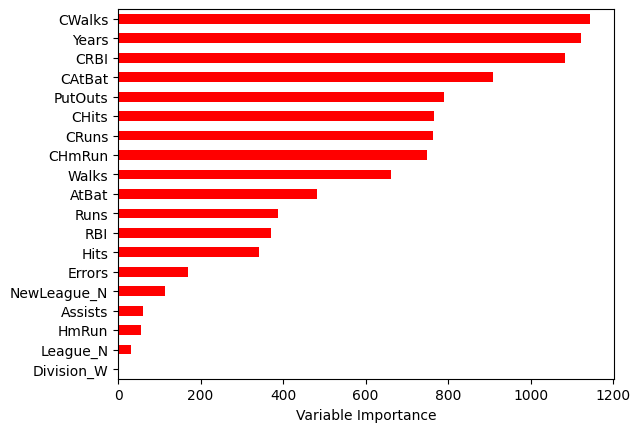

In [122]:
Importance = pd.DataFrame({"Importance":catb_tuned_model.feature_importances_*100},
                          index=X_train.columns)

Importance.sort_values(by ="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color ="r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None

---
# MAKİNE ÖĞRENMESİ GÖREVLERİNİN OTOMATİKLEŞTİRİLMESİ
---

In [281]:
df  = pd.read_csv("../linear_regression/Hitters.csv")       # veriyi okuma
df  = df.dropna()                                           # veri ön işleme
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular

In [349]:
def compML(df, dependent_variable, algorithm): #dataset,Y,algorithm name
    #traint-test ayrimi
    Y   = df[dependent_variable]                                          # bağımlı değişken
    X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
    X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y,
                                                        test_size=0.25,
                                                        random_state=42) # %25 test için ayrıldı.
    #modelleme
    model   = algorithm().fit(X_train,Y_train)
    y_pred  = model.predict(X_test)
    RMSE    = np.sqrt(mean_squared_error(Y_test,y_pred))
    model_name = algorithm.__name__
    print(model_name,"Modeli Test Hatasi:",RMSE)

In [350]:
compML(df,"Salary", SVR)

SVR Modeli Test Hatasi: 460.0032657244849


In [360]:
models = [lambda: LGBMRegressor(verbosity=-1),
          #lambda: XGBRegressor(verbosity=0),
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR,
          lambda: CatBoostRegressor(silent=True)]

In [361]:
for model in models:
    compML(df,"Salary",model)

<lambda> Modeli Test Hatasi: 363.8712087611089
GradientBoostingRegressor Modeli Test Hatasi: 349.1545753738481
RandomForestRegressor Modeli Test Hatasi: 337.3722495750621
DecisionTreeRegressor Modeli Test Hatasi: 454.40147103770175
MLPRegressor Modeli Test Hatasi: 436.6127859360846
KNeighborsRegressor Modeli Test Hatasi: 426.6570764525201
SVR Modeli Test Hatasi: 460.0032657244849
<lambda> Modeli Test Hatasi: 351.194631344607
